## WrappedITK Curvature Anisotropic Diffusion

The below deals with bluring and imagin using curvature anistropic diffusion. This is a fairly standard wrapped-ITK example taken from the [sphinx documentation](http://itk.org/ITKExamples/src/Filtering/AnisotropicSmoothing/ComputeCurvatureAnisotropicDiffusion/Documentation.html)

In [11]:
import itk

In [51]:
InputPixelType = itk.F
OutputPixelType = itk.UC
Dimensions = 2

numberOfIterations = 50
timeStep = 0.1
conductance = 0.4

inputFileName = '../../BrainProtonDensitySlice.png'
outputFileName = 'out.png'

outputPixelTypeMin = itk.NumericTraits[OutputPixelType].min()
outputPixelTypeMax = itk.NumericTraits[OutputPixelType].max()

InputImageType = itk.Image[InputPixelType, Dimensions]
OutputImageType = itk.Image[OutputPixelType, Dimensions]
ReaderType = itk.ImageFileReader[InputImageType]
FilterType = itk.CurvatureAnisotropicDiffusionImageFilter[InputImageType, InputImageType]
RescalerType = itk.RescaleIntensityImageFilter[InputImageType, OutputImageType]
WriterType = itk.ImageFileWriter[OutputImageType]

reader = ReaderType.New()
reader.SetFileName(inputFileName)

cadFilter = FilterType.New()
cadFilter.SetInput(reader.GetOutput())
cadFilter.SetNumberOfIterations(numberOfIterations)
cadFilter.SetTimeStep(timeStep)
cadFilter.SetConductanceParameter(conductance)

rescalar = RescalerType.New()
rescalar.SetInput(cadFilter.GetOutput())
rescalar.SetOutputMinimum(outputPixelTypeMin)
rescalar.SetOutputMaximum(outputPixelTypeMax)

writer = WriterType.New()
writer.SetFileName(outputFileName)
writer.SetInput(rescalar.GetOutput())
writer.Update()


itkImageFileReaderIF2: 0.000000itkImageFileReaderIF2: 1.000000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.000000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.000000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.020000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.020000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.040000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.040000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.060000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.060000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.080000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.080000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.100000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.100000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.120000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.120000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.140000itkCurvatureAnisotropicDiffusionImageFilterIF2IF2: 0.

In [41]:
from matplotlib import pylab

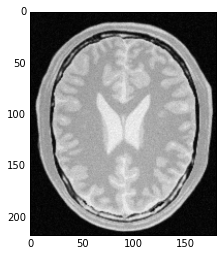

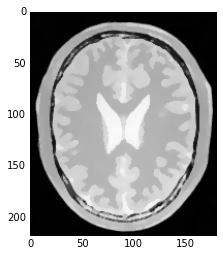

In [52]:
%matplotlib inline
y = pylab.imread('../../BrainProtonDensitySlice.png')
pylab.figure()
pylab.imshow(y, cmap=pylab.gray())
x = pylab.imread('out.png')
pylab.figure()
pylab.imshow(x, cmap=pylab.gray())